In [13]:
from pynq import Overlay
from pynq.lib.video import *

base = Overlay("sobel6.bit")
hdmi_in = base.video.hdmi_in
#hdmi_out = base.video.hdmi_out
#only sobel working sobel6.bit
#partial canny working fullsobel7.bit 

/usr/local/lib/python3.6/dist-packages/pynq/overlay.py:299: UserWarning: Users will not get PARAMETERS / REGISTERS information through TCL files. HWH file is recommended.
  warnings.warn(message, UserWarning)


In [3]:
hdmi_in.configure()
hdmi_in.start()
hdmi_out = base.video.hdmi_out
hdmi_out.configure(hdmi_in.mode)
hdmi_out.start()
hdmi_in.tie(hdmi_out)

In [23]:
hdmi_in.mode

VideoMode: width=1280 height=720 bpp=24

In [14]:
hdmi_in.configure(PIXEL_RGB)
hdmi_in.start()
hdmi_out = base.video.hdmi_out
hdmi_out.configure(hdmi_in.mode)
hdmi_out.start()
colorspace_in = base.video.hdmi_in.color_convert
colorspace_out = base.video.hdmi_out.color_convert

bgr2rgb = [0, 0, 1,
           0, 1, 0, 
           1, 0, 0,
           0, 0, 0]

out =     [0, 0, 1,
           0, 1, 0, 
           1, 0, 0,
           0, 0, 0]



colorspace_in.colorspace = bgr2rgb
colorspace_out.colorspace = out

In [15]:
hdmi_in.tie(hdmi_out)

In [2]:
pixel_in = base.video.hdmi_in.pixel_pack
pixel_in.bits_per_pixel = 8
hdmi_in.configure(pynq.lib.video.PIXEL_GRAY)
#hdmi_in._pixel.bits_per_pixel =32
#hdmi_in._hdmi.start()
#dir(hdmi_in)
#hdmi_out.start()
#hdmi_in.start()

In [3]:
vdma = hdmi_in._vdma

In [170]:
dir(hdmi_in)
print(hdmi_in.pixel_pack.bits_per_pixel)
#help(hdmi_in._vdma.readchannel)
#print(hdmi_in.color_convert.colorspace)
#print(hdmi_in.colorspace)
#help(hdmi_in._vdma.S2MMChannel)
type(hdmi_in._vdma.S2MMChannel.mode)

8


property

In [76]:
print(hdmi_in._hdmi)
#help(hdmi_in._hdmi)
#hdmi_in.frontend.mode = VideoMode(720, 1280, 8)
print(hdmi_in.frontend.mode)

VideoMode: width=1280 height=720 bpp=24


In [4]:
vdma.readchannel.stop()
vdma.readchannel.mode = VideoMode(1280,720,8,25, stride=1280)
vdma.readchannel.start()

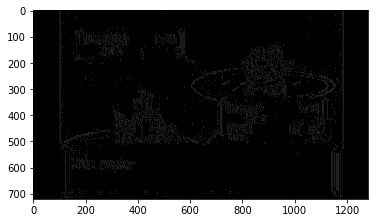

In [22]:
import matplotlib.pyplot as plt
plt.imshow(fr)

In [21]:
import time
t = time.time()
hdmi_in.readframe()
print(time.time() - t)

0.009518146514892578


In [22]:
hdmi_in.stop()
hdmi_out.stop()

In [22]:
fr[5][0]

0

In [28]:
import cv2
cv2.imwrite('hdm.png', fr)

True

In [143]:
hdmi_in._vdma.readchannel.mode = VideoMode(1280,720,8,25)
hdmi_in._vdma.readchannel.start()


VideoMode: width=1280 height=720 bpp=8
Help on method read in module pynq.overlay:

read(offset=0) method of pynq.lib.video.dma.AxiVDMA instance
    Read from the MMIO device
    
    Parameters
    ----------
    offset : int
        Address to read



In [229]:
fr[0][0:10]

ContiguousArray([ 61,  61, 123, 122, 122, 123, 124, 123, 122, 123], dtype=uint8)

In [22]:
vid = base.video.hdmi_in.split_ip_0
vid.register_map.a = 500
#vid1 = base.video.apply_0
#vid.register_map.cnt = 0;
print(vid.register_map)
#print(vid1.register_map)

RegisterMap {
  a = Register(a=500)
}


In [21]:
vid.register_map

RegisterMap {
  a = Register(a=1280)
}

In [11]:
hdmi_out = base.video.hdmi_out
pixel_in = base.video.hdmi_in.pixel_pack
pixel_in.bits_per_pixel = 8
hdmi_in = base.video.hdmi_in
hdmi_in.configure(pynq.lib.video.PIXEL_GRAY)
hdmi_out.configure(VideoMode(1280,720,8,10))
hdmi_in.start()
hdmi_out.start()
#hdmi_out.writeframe(fr)
hdmi_in.tie(hdmi_out)

In [ ]:
hdmi_in.configure()
hdmi_in.start()
hdmi_out.configure(hdmi_in.mode)
hdmi_out.start()
hdmi_in.tie(hdmi_out)

In [8]:
from pynq import MMIO
sobel_ip = MMIO(0x43C00000,0x10000)
i = 0
#while(True):
sobel_ip.write(0x10,500)
i = i+1
#    time.sleep(0.01)
sobel_ip.read(0x10)

500

In [11]:
leds = base.leds_gpio.channel1
leds.setdirection('out')
leds.setlength(4)
leds[0].on()

In [10]:
hdmi_out.mode

VideoMode: width=1280 height=720 bpp=24